## Predict how much energy will a building consume with Fedot.Industrial

Dataset published on Kaggle, aims to assess the value of energy efficiency improvements. For that purpose, four types of sources are identified: electricity, chilled water, steam and hot water. The goal is to estimate the **energy consumption in kWh**. Dimensions correspond to the air temperature, dew temperature, wind direction and wind speed. These values were taken hourly during a week, and the output is the meter reading of the four aforementioned sources. In this way, was created four datasets:  **ChilledWaterPredictor**, **ElectricityPredictor**, **HotwaterPredictor**, and **SteamPredictor**.
Link to the dataset - https://www.kaggle.com/code/fatmanuranl/ashrae-energy-prediction2

In [ ]:
import sys
import os

project_path = r"add_project_path_here\Fedot.Industrial"
sys.path.append(project_path)

In [1]:
import pandas as pd
from fedot.core.pipelines.pipeline_builder import PipelineBuilder
from fedot_ind.tools.loader import DataLoader
from fedot_ind.api.main import FedotIndustrial
from fedot_ind.core.architecture.pipelines.abstract_pipeline import ApiTemplate

In [2]:
from fedot_ind.core.repository.config_repository import DEFAULT_COMPUTE_CONFIG, DEFAULT_REG_AUTOML_CONFIG, DEFAULT_AUTOML_LEARNING_CONFIG

initial_assumption = {0: ['quantile_extractor', 'treg']}

API_CONFIG = {'industrial_config': {'problem': 'regression'},
              'automl_config': DEFAULT_REG_AUTOML_CONFIG,
              'learning_config': {'learning_strategy': 'from_scratch',
                                  'learning_strategy_params': DEFAULT_AUTOML_LEARNING_CONFIG,
                                  'optimisation_loss': {'quality_loss': 'rmse'}},
              'compute_config': DEFAULT_COMPUTE_CONFIG}
METRIC_NAMES = ('r2', 'rmse', 'mae')
dataset_name = 'HotwaterPredictor'
data_path = project_path + '/examples/data'

In [3]:
api_client = ApiTemplate(api_config=API_CONFIG,
                         metric_list=METRIC_NAMES)

Next steps are quite straightforward. We need to fit the model and then predict the values for the test data just like for any other model in sklearn.

At the `fit` stage FedotIndustrial will transform initial time series data into features dataframe and will train regression model.

In [4]:
result_dict = api_client.eval(dataset=dataset_name, finetune=False)

Creating Dask Server
2024-07-09 16:18:08,633 - To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
2024-07-09 16:18:08,638 - State start
2024-07-09 16:18:10,295 -   Scheduler at: inproc://10.64.4.227/3192/1
2024-07-09 16:18:10,296 -   dashboard at:  http://10.64.4.227:51991/status
2024-07-09 16:18:10,296 - Registering Worker plugin shuffle
2024-07-09 16:18:11,931 -       Start worker at: inproc://10.64.4.227/3192/4
2024-07-09 16:18:11,932 -          Listening to:          inproc10.64.4.227
2024-07-09 16:18:11,932 -           Worker name:                          0
2024-07-09 16:18:11,934 -          dashboard at:          10.64.4.227:51998
2024-07-09 16:18:11,935 - Waiting to connect to: inproc://10.64.4.227/3192/1
2024-07-09 16:18:11,936 - -------------------------------------------------
2024-07-09 16:18:11,936 -               Threads:                          8
2024-07-09 16:18:11,937 -                Memory:     

Generations:   0%|          | 0/10000 [00:00<?, ?gen/s]

IndustrialDispatcher - Number of used CPU's: 8


Exception ignored in: <function _WeakKeyDictionary.__setitem__.<locals>.on_destroy at 0x000001E5EBF62DC0>
Traceback (most recent call last):
  File "C:\Users\user\AppData\Local\pypoetry\Cache\virtualenvs\fedot-ind-bTwQVkVM-py3.9\lib\site-packages\joblib\_dask.py", line 87, in on_destroy
    del self._data[key]
KeyError: 2086944028592
Exception ignored in: <function _WeakKeyDictionary.__setitem__.<locals>.on_destroy at 0x000001E5EAEFA1F0>
Traceback (most recent call last):
  File "C:\Users\user\AppData\Local\pypoetry\Cache\virtualenvs\fedot-ind-bTwQVkVM-py3.9\lib\site-packages\joblib\_dask.py", line 87, in on_destroy
    del self._data[key]
KeyError: 2087025023088
Exception ignored in: <function _WeakKeyDictionary.__setitem__.<locals>.on_destroy at 0x000001E5ED3F6670>
Traceback (most recent call last):
  File "C:\Users\user\AppData\Local\pypoetry\Cache\virtualenvs\fedot-ind-bTwQVkVM-py3.9\lib\site-packages\joblib\_dask.py", line 87, in on_destroy
    del self._data[key]
KeyError: 208702

IndustrialDispatcher - 4 individuals out of 21 in previous population were evaluated successfully. 0.19047619047619047% is a fairly small percentage of successful evaluation.
IndustrialEvoOptimizer - Generation num: 1 size: 4
IndustrialEvoOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=1260.726 node_number=0.200>']
GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 0/10000 [20:15<?, ?gen/s]

OptimisationTimer - Composition time: 20.258 min
OptimisationTimer - Algorithm was terminated due to processing time limit
IndustrialEvoOptimizer - Generation num: 2 size: 1
IndustrialEvoOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=1260.726 node_number=0.200>']
IndustrialEvoOptimizer - no improvements for 1 iterations
IndustrialEvoOptimizer - spent time: 20.3 min
GPComposer - GP composition finished


ApiComposer - Model generation finished
FEDOT logger - Final pipeline was fitted
FEDOT logger - Final pipeline: {'depth': 2, 'length': 2, 'nodes': [treg, quantile_extractor]}
treg - {}
quantile_extractor - {'window_size': 40, 'stride': 2, 'add_global_features': True}
MemoryAnalytics - Memory consumption for finish in main session: current 219.8 MiB, max: 283.8 MiB
FEDOT logger - Predictions was saved in current directory.


In [5]:
result_dict['metrics']

,r2,rmse,mae
0,0.297,1106.248,679.281


In [6]:
opt_hist = result_dict['industrial_model'].save_optimization_history(return_history=True)

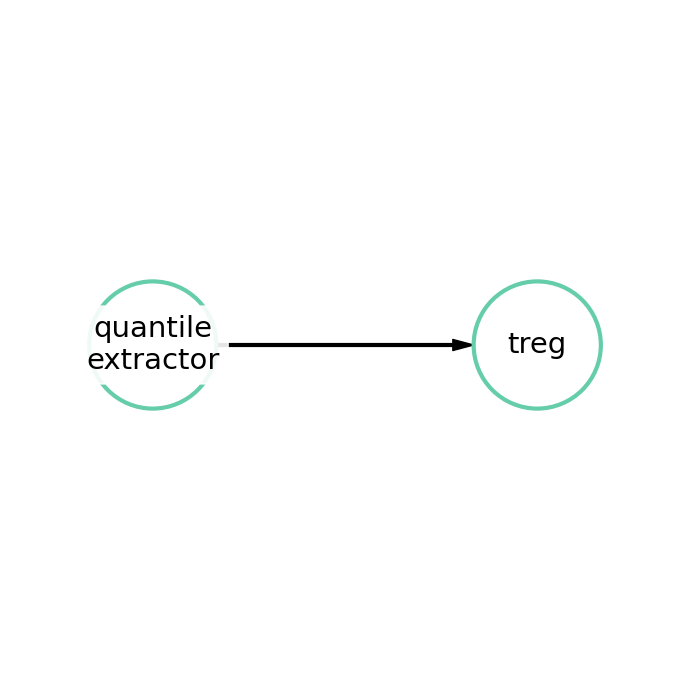

In [7]:
result_dict['industrial_model'].solver.current_pipeline.show()

In [8]:
opt_hist = result_dict['industrial_model'].vis_optimisation_history(
        opt_history_path=opt_hist,mode='fitness', return_history=True)

FitnessBox - Visualizing optimization history... It may take some time, depending on the history size.
2024-07-09 16:42:09,464 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-09 16:42:09,470 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
default - The figure was saved to "D:\WORK\Repo\Industiral\IndustrialTS\examples\real_world_examples\industrial_examples\energy_monitoring\ts_regression\fitness_by_generation.png".


In [9]:
opt_hist = result_dict['industrial_model'].vis_optimisation_history(
        opt_history_path=opt_hist,mode='models', return_history=True)

OperationsAnimatedBar - Visualizing optimization history... It may take some time, depending on the history size.
2024-07-09 16:42:10,406 - MovieWriter ffmpeg unavailable; using Pillow instead.
2024-07-09 16:42:10,407 - Animation.save using <class 'matplotlib.animation.PillowWriter'>
OperationsAnimatedBar - The animation was saved to "D:\WORK\Repo\Industiral\IndustrialTS\examples\real_world_examples\industrial_examples\energy_monitoring\ts_regression\operations_animated_bar.gif".


In [10]:
import numpy as np
from matplotlib import pyplot as plt
predictions = np.vstack([api_client.test_data[1].flatten(),result_dict['labels'].flatten()]).T

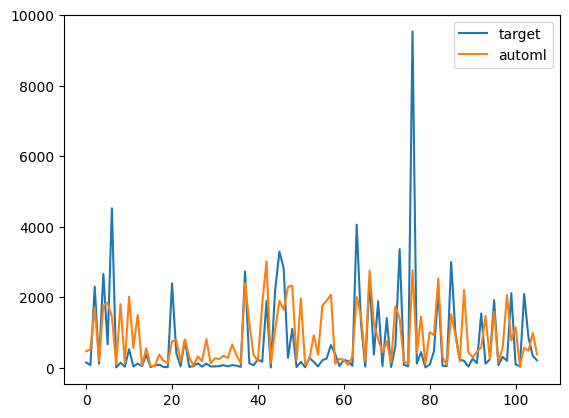

In [12]:
all_prediction = pd.DataFrame(predictions,columns=['target','automl'])
all_prediction.plot()
plt.show()

In [13]:
result_dict['industrial_model'].solver.return_report()

,days,hours,minutes,seconds,milliseconds
Data Definition (fit),0,0,0,0,0
Data Preprocessing,0,0,0,0,0
Fitting (summary),0,0,20,58,34
Composing,0,0,20,41,796
Train Inference,0,0,0,15,937
Tuning (composing),0,0,0,0,0
Tuning (after),0,0,0,0,0
Data Definition (predict),0,0,0,0,0
Predicting,0,0,0,2,775


## Compare with State of Art (SOTA) models

In [14]:
df = pd.read_csv(data_path+'/ts_regression_sota_results.csv',sep=';')
df = df[df['ds/type'] == dataset_name].iloc[:,:25]
df.index = df['algorithm']
df = df.drop(['algorithm','ds/type'], axis=1)
df = df.replace(',','.', regex=True).astype(float)

In [15]:
df['Fedot_Industrial_AutoML'] = result_dict['metrics']['rmse'][0]
df = df.T

In [16]:
df.sort_values('min')['min']

CNN_RMSE                    867.167248
FCN_RMSE                    886.301979
InceptionT_RMSE             958.396510
SingleInception_RMSE        961.233445
ResNet_RMSE                 973.711924
RDST_RMSE                   986.749722
RIST_RMSE                  1032.905074
FPCR_RMSE                  1047.799053
ROCKET_RMSE                1049.727695
FreshPRINCE_RMSE           1051.735216
MultiROCKET_RMSE           1065.140487
5NN-DTW_RMSE               1071.163827
RandF_RMSE                 1076.629639
DrCIF_RMSE                 1080.966688
FPCR-Bs_RMSE               1099.364430
Fedot_Industrial_AutoML    1106.248000
5NN-ED_RMSE                1110.793732
XGBoost_RMSE               1155.910532
TSF_RMSE                   1178.412908
RotF_RMSE                  1189.173860
Grid-SVR_RMSE              1246.184958
1NN-DTW_RMSE               1396.816565
1NN-ED_RMSE                1615.919446
Ridge_RMSE                 2286.355459
Name: min, dtype: float64

In [17]:
df.sort_values('max')['max']

Fedot_Industrial_AutoML    1106.248000
RDST_RMSE                  1223.537234
FCN_RMSE                   1261.023121
RIST_RMSE                  1286.172802
ResNet_RMSE                1314.236132
CNN_RMSE                   1329.048575
ROCKET_RMSE                1381.935767
SingleInception_RMSE       1403.745725
DrCIF_RMSE                 1426.485773
InceptionT_RMSE            1432.379154
FreshPRINCE_RMSE           1467.946007
MultiROCKET_RMSE           1479.726986
RandF_RMSE                 1529.707449
FPCR_RMSE                  1566.918068
RotF_RMSE                  1597.388873
XGBoost_RMSE               1620.479639
TSF_RMSE                   1624.255525
5NN-DTW_RMSE               1652.839501
FPCR-Bs_RMSE               1667.648841
5NN-ED_RMSE                1825.271162
Grid-SVR_RMSE              1934.918113
1NN-DTW_RMSE               2101.344987
1NN-ED_RMSE                2322.456606
Ridge_RMSE                 3337.671272
Name: max, dtype: float64

In [18]:
df.sort_values('average')['average']

FCN_RMSE                   1072.502657
Fedot_Industrial_AutoML    1106.248000
RDST_RMSE                  1142.764246
ResNet_RMSE                1145.645542
InceptionT_RMSE            1156.251420
SingleInception_RMSE       1162.325568
RIST_RMSE                  1172.270167
CNN_RMSE                   1174.255738
ROCKET_RMSE                1236.408458
FreshPRINCE_RMSE           1240.376659
DrCIF_RMSE                 1246.467591
MultiROCKET_RMSE           1252.545137
RandF_RMSE                 1310.439205
FPCR_RMSE                  1331.504687
5NN-DTW_RMSE               1337.373398
RotF_RMSE                  1383.306131
TSF_RMSE                   1401.285094
XGBoost_RMSE               1424.823440
FPCR-Bs_RMSE               1427.171255
5NN-ED_RMSE                1458.866739
Grid-SVR_RMSE              1587.147748
1NN-DTW_RMSE               1819.103151
1NN-ED_RMSE                1906.032299
Ridge_RMSE                 2719.383329
Name: average, dtype: float64